In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Chargement et traitement des données

In [2]:
df= pd.read_csv('kc_house_data.csv')

In [3]:
# Display the first five observations
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Describe the dataset
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [5]:
# Drop the id and date columns
df.drop(['id', 'date'], axis=1, inplace=True)

In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# Display the number of null data observations
df.isnull().values.sum()

0

In [8]:
# Specify target and features
target = df.columns[0]
features = df.columns[1:]
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
target

'price'

In [10]:
# Correlations of features with target variable
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [11]:
df.loc[:, features] = (df - df.mean())/df.std()

In [12]:
class Datatable:

    def __init__(self, x, y):
        self.m = len(y)
        self.x = x
        self.y = y.reshape((self.m, 1))
        self.X = np.hstack( (self.x, np.ones_like(self.x) ) )

class RegressionLinear:

    def __init__(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
        self.train = Datatable(x_train, y_train)
        self.test = Datatable(x_test, y_test)
        self.theta_0 = np.random.randn(self.train.X.shape[1], 1)

    def nabla(self):
        return 1/self.train.m * self.train.X.T @ (self.train.X @ self.theta - self.train.y)

    def trainIt(self, k, a):
        self.theta = self.theta_0
        for i in range(k):
            self.theta -= a * self.nabla()

    def cost(self):
        train_cost = 1/(2*self.train.m) * ((self.train.X @ self.theta - self.train.y) ** 2).sum()
        test_cost = 1/(2*self.test.m) * ((self.test.X @ self.theta - self.test.y) ** 2).sum()
        return train_cost, test_cost
    
    def coef_det(self):
        u_train = ((self.train.y - self.train.X @ self.theta)**2).sum()
        v_train = ((self.train.y - self.train.y.mean())**2).sum()

        u_test = ((self.test.y - self.test.X @ self.theta)**2).sum()
        v_test = ((self.test.y - self.train.y.mean())**2).sum()
        
        return 1 - u_train/v_train, 1 - u_test/v_test

In [13]:
all = RegressionLinear(df[features].values, df[target].values)
all.trainIt(k=1000, a=0.01)
all.coef_det()

(0.7037953444636267, 0.6927073791805436)

In [14]:
# Correlations with target variable
cor_target = abs(correlations['price'])

# Display features with correlation < 0.2
removed_features = cor_target[cor_target < 0.2]
survived_features = list(cor_target[cor_target >= 0.2].index)
survived_features

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15']

In [15]:
# Remove features with correlation < 0.2
df = df.drop(removed_features.index, axis=1)

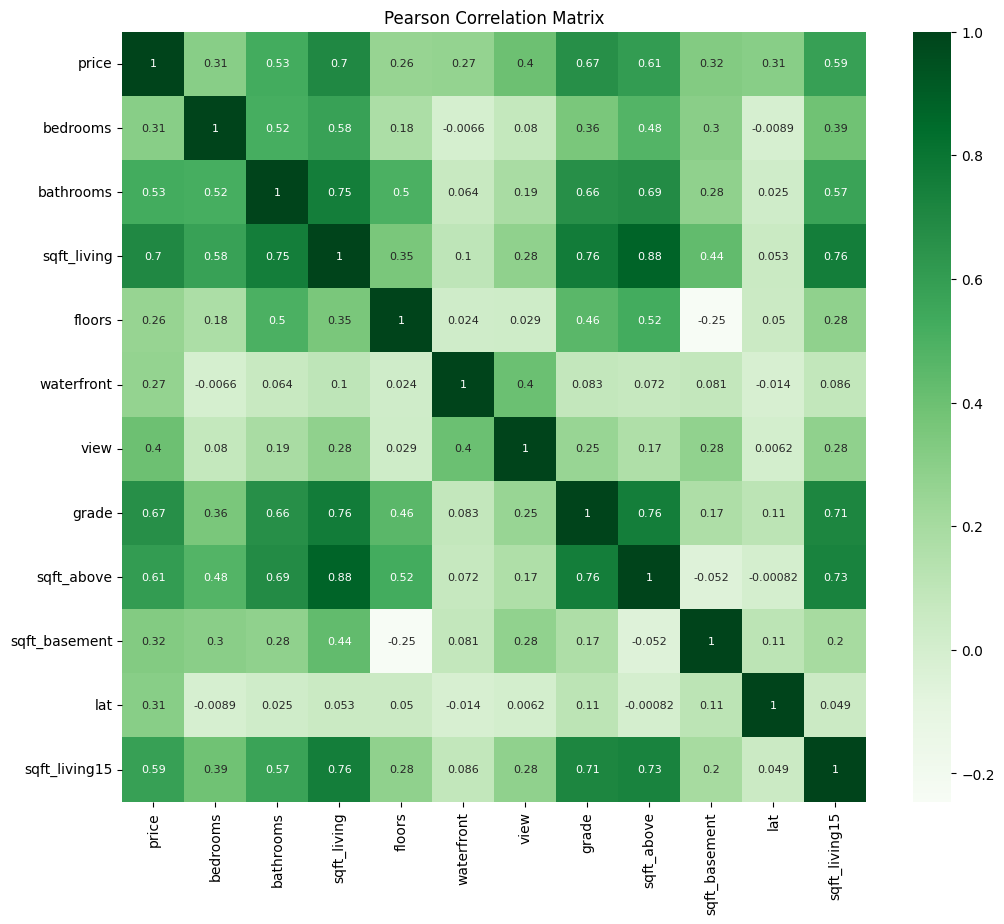

In [16]:
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [17]:
non_weak_features = RegressionLinear(df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']].values, df[target].values)
non_weak_features.trainIt(k=1000, a=0.01)
non_weak_features.coef_det()

(0.6615452943044717, 0.6511183520351758)

In [18]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876597,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755923,-,-,-
sqft_above,-,-,-,0.876597,-,-,-,0.755923,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


In [19]:
# Remove features which are highly correlated with "sqft_living"
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [20]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
len_of_features = len(features)
len_of_features

# Display the first five observations
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,-0.398728,-1.447430,-0.979812,-0.915406,-0.087171,-0.305752,-0.558823,-0.658666,-0.352564
1,538000.0,-0.398728,0.175603,0.533622,0.936484,-0.087171,-0.305752,-0.558823,0.245136,1.161541
2,180000.0,-1.473925,-1.447430,-1.426221,-0.915406,-0.087171,-0.305752,-1.409554,-0.658666,1.283507
3,604000.0,0.676469,1.149422,-0.130547,-0.915406,-0.087171,-0.305752,-0.558823,1.397483,-0.283281
4,510000.0,-0.398728,-0.149004,-0.435412,-0.915406,-0.087171,-0.305752,0.291909,-0.658666,0.409541


In [29]:
final = RegressionLinear(df[['bedrooms', 'bathrooms','sqft_living','floors','waterfront','view','grade','sqft_basement','lat']].values, df[target].values)
final.trainIt(k=1000, a=0.01)
final.coef_det()

(0.9989972939241349, 0.9990494108579688)

Le tableau ci-dessous compare la performance des 3 cas :

<table>
    <tr>
        <th rowspan="2"></th>
        <th colspan="2">Coef. de détermination</th>
    </tr>
    <tr>
        <th>Train</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Toutes les features</td>
        <td>70.37%</td>
        <td>69.27%</td>
    </tr>
    <tr>
        <td>Features ayant une corrélation supérieur à 0.2</td>
        <td>66.15%</td>
        <td>65.11%</td>
    </tr>
    <tr>
        <td>Features ayant une faible intercorrélation</td>
        <td>99.89%</td>
        <td>99.04%</td>
    </tr>
</table>

On observe que les modèles construits sur les 2 premiers cas ont des performances similaires. En effet, la corrélation entre les caractéristiques et la cible est suffisante pour expliquer la variance du prix. Le modèle construit sur le dernier cas a une performance légèrement supérieure. En effet, la suppression des caractéristiques ayant une forte intercorrélation a entraîné la perte d'information.

La performance d'un modèle de prédiction du prix dépend de la qualité des données et de la méthode de sélection des caractéristiques.